In [1]:
__author__ = 'Shi Fan'
import csv
import pandas as pd
import numpy as np
import json
from scipy import stats
import statsmodels.formula.api as smf
import pylab as pl
s = json.load(open('fbb_matplotlibrc.json'))
pl.rcParams.update(s)
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/Users/fancyshmancy/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:855: UserWarning: svg.embed_char_paths is deprecated and replaced with svg.fonttype; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
df = pd.read_csv('data/per_capita_msa.csv')
df_cut = df[df['POP2000']>100000]
df_cut['Density'] = df_cut['POP2000']/df_cut['ALAND10']
df_cut.drop(['Unnamed: 0'], axis=1, inplace=True)

/Users/fancyshmancy/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Users/fancyshmancy/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


### Per capita emission vs Size (Population)

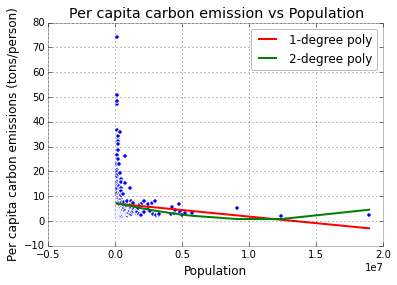

In [3]:
df_cut = df_cut.sort(['POP2000'])
pl.scatter(df_cut['POP2000'],df_cut['Total'])
fit0 = smf.ols(formula = "Total ~ 1 + POP2000", data=df_cut).fit()
pl.plot(df_cut['POP2000'], fit0.predict(), 'r', label='1-degree poly')
fit1 = smf.ols(formula = "Total ~ 1 + POP2000 + I(POP2000**2) ", data=df_cut).fit()
pl.plot(df_cut['POP2000'], fit1.predict(), 'g', label='2-degree poly')
pl.xlabel('Population')
pl.ylabel('Per capita carbon emissions (tons/person)')
pl.title('Per capita carbon emission vs Population')
pl.legend()

In [4]:
print fit0.params
print fit1.params
print 'Correlation coefficient: %f' % (stats.pearsonr(df_cut['POP2000'],df_cut['Total'])[0])

Intercept    7.041174e+00
POP2000     -5.275986e-07
dtype: float64
Intercept          7.374189e+00
POP2000           -1.254979e-06
I(POP2000 ** 2)    5.837448e-14
dtype: float64
Correlation coefficient: -0.102636


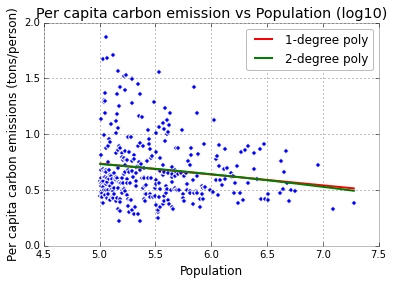

In [5]:
df_cut['POPlog'] = np.log10(df_cut['POP2000'])
df_cut['Totlog'] = np.log10(df_cut['Total'])
pl.scatter(df_cut['POPlog'],df_cut['Totlog'])
fit0log = smf.ols(formula = "Totlog ~ 1 + POPlog", data=df_cut).fit()
pl.plot(df_cut['POPlog'], fit0log.predict(), 'r', label='1-degree poly')
fit1log = smf.ols(formula = "Totlog ~ 1 + POPlog + I(POPlog**2) ", data=df_cut).fit()
pl.plot(df_cut['POPlog'], fit1log.predict(), 'g', label='2-degree poly')
pl.xlabel('Population')
pl.ylabel('Per capita carbon emissions (tons/person)')
pl.title('Per capita carbon emission vs Population (log10)')
pl.legend()

In [6]:
print fit0log.params
print fit1log.params
print 'Correlation coefficient: %f' % (stats.pearsonr(df_cut['POPlog'],df_cut['Totlog'])[0])

Intercept    1.223942
POPlog      -0.097472
dtype: float64
Intercept         0.871022
POPlog            0.025716
I(POPlog ** 2)   -0.010663
dtype: float64
Correlation coefficient: -0.146746


###  Per capita emission vs Density

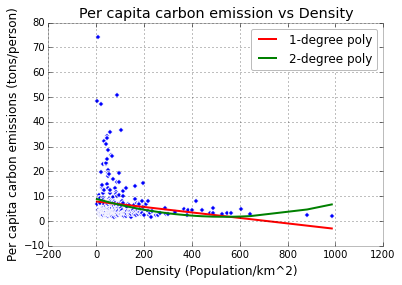

In [7]:
df_cut = df_cut.sort(['Density'])
pl.scatter(df_cut['Density'],df_cut['Total'])
fit0d = smf.ols(formula = "Total ~ 1 + Density", data=df_cut).fit()
pl.plot(df_cut['Density'], fit0d.predict(), 'r', label='1-degree poly')
fit1d = smf.ols(formula = "Total ~ 1 + Density + I(Density**2) ", data=df_cut).fit()
pl.plot(df_cut['Density'], fit1d.predict(), 'g', label='2-degree poly')
pl.xlabel('Density (Population/km^2)')
pl.ylabel('Per capita carbon emissions (tons/person)')
pl.title('Per capita carbon emission vs Density')
pl.legend()

In [8]:
print fit0d.params
print fit1d.params
print 'Correlation coefficient: %f' % (stats.pearsonr(df_cut['Density'],df_cut['Total'])[0])

Intercept    7.864776
Density     -0.011047
dtype: float64
Intercept          8.918343
Density           -0.026871
I(Density ** 2)    0.000025
dtype: float64
Correlation coefficient: -0.165358


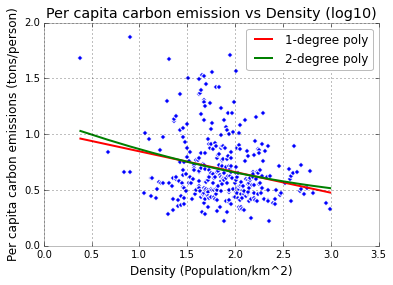

In [9]:
df_cut['Dlog'] = np.log10(df_cut['Density'])
pl.scatter(df_cut['Dlog'],df_cut['Totlog'])
fit0dlog = smf.ols(formula = "Totlog ~ 1 + Dlog", data=df_cut).fit()
pl.plot(df_cut['Dlog'], fit0dlog.predict(), 'r', label='1-degree poly')
fit1dlog = smf.ols(formula = "Totlog ~ 1 + Dlog + I(Dlog**2) ", data=df_cut).fit()
pl.plot(df_cut['Dlog'], fit1dlog.predict(), 'g', label='2-degree poly')
pl.xlabel('Density (Population/km^2)')
pl.ylabel('Per capita carbon emissions (tons/person)')
pl.title('Per capita carbon emission vs Density (log10)')
pl.legend()

In [10]:
print fit0dlog.params
print fit1dlog.params
print 'Correlation coefficient: %f' % (stats.pearsonr(df_cut['Dlog'],df_cut['Totlog'])[0])

Intercept    1.031538
Dlog        -0.185248
dtype: float64
Intercept       1.143155
Dlog           -0.311341
I(Dlog ** 2)    0.034091
dtype: float64
Correlation coefficient: -0.238752


In [11]:
df_cut = df_cut.sort(['Total'])

In [13]:
df_cut.to_csv('data/msa_analyzed.csv')

In [14]:
print np.mean(df_cut['POP2000']), np.mean(df_cut['Density'])

691318.504505 107.572526386


In [15]:
print np.median(df_cut['POP2000']), np.median(df_cut['Density'])

249700.0 71.5330841757


In [18]:
print np.median(df_cut['Total']), np.median(df_cut['POPlog']), np.median(df_cut['Dlog'])

4.04257922876 5.39741854235 1.85450695022


In [13]:
medt = np.median(df_cut['Total'])
np.mean(df_cut[df_cut['Total']<medt])

Total                    3.033724
Commercial               0.215886
Industrial               0.429273
Residential              0.345059
Electricity Prod         0.228205
Onroad                   1.412499
Cement                   0.022177
Aircraft                 0.062055
Airborne                 0.157705
Nonroad                  0.160864
POP2000             818012.018072
ALAND10               6429.458192
MSA Code             30791.566265
Density                123.666959
POPlog                   5.537610
Totlog                   0.474036
Dlog                     1.914150
dtype: float64

In [15]:
np.median(df_cut[df_cut['Total']<medt]['POP2000'])

264441.0

In [16]:
np.median(df_cut[df_cut['Total']<medt]['Density'])

85.618301790992135